In [0]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
import nltk

from nltk.tokenize import RegexpTokenizer

from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/rafaelsguerra/information_retrieval/master/lab02/results.csv?token=AEGSL3DCLQXO62I7AAHDPD24Y5VZC')

In [0]:
# Para a estratégia de tokenização, foi optado incluir números palavras compostas por hífen (sexta-feira é considerada como uma só palavra).

tokenizer = RegexpTokenizer(r'\b[A-zÀ-ú\d\-\']+') 
tokens = []

for document in data['text']:
  tokens.extend(tokenizer.tokenize(document.lower())) 

In [0]:
# Ainda como parte da estratégia, foi decidido retirar stopwords e palavras com tamanho 2 ou maior.
# Todas as palavras estão escritas em caixa baixa.

stopwords = stopwords.words('portuguese')

filtered_tokens = []

for token in tokens:
  if token not in stopwords  and len(token) >= 2: # and len(token) > 2
    filtered_tokens.append(token)


In [0]:
c = collections.Counter(filtered_tokens)

In [0]:
count_more_than_1000 = 0

values = sorted(c.values())

for value in reversed(values):
    if value >= 1000:
        count_more_than_1000 += 1
    else:
        break

In [0]:
count_once = 0

for value in values:
    if value <= 1:
        count_once += 1
    else:
        break

In [0]:
total_documents = data['text'].size
total_word_occurrencies = sum(c.values())
vocabulary_size = len(c.keys())

In [0]:
print("Total documents:                            " + str(total_documents) + "\n" + 
      "Total word occurencies:                     " + str(total_word_occurrencies) + "\n" +
      "Vocabulary size:                            " + str(vocabulary_size) + "\n" + 
      "Words occurring more than 1000 times:       " + str(count_more_than_1000) + "\n" +
      "Words occurring once:                       " + str(count_once))

Total documents:                            249
Total word occurencies:                     119474
Vocabulary size:                            23360
Words occurring more than 1000 times:       0
Words occurring once:                       11777


In [0]:
results = []

for i in range(len(c.most_common(50))):
    results.append((c.most_common(50)[i][0], c.most_common(50)[i][1], i + 1))

labels = ['Word', 'Freq', 'Rank']
df = pd.DataFrame.from_records(data = results, columns=labels)
df['Pr(%)'] = df.Freq / total_word_occurrencies
df['r*Pr'] = df.Rank * df['Pr(%)']
df

,Word,Freq,Rank,Pr(%),r*Pr
0,anos,584,1,0.004888,0.004888
1,ser,504,2,0.004218,0.008437
2,sobre,426,3,0.003566,0.010697
3,bolsonaro,372,4,0.003114,0.012455
4,presidente,370,5,0.003097,0.015485
5,governo,352,6,0.002946,0.017677
6,país,339,7,0.002837,0.019862
7,ainda,337,8,0.002821,0.022566
8,brasil,332,9,0.002779,0.025010
9,ter,256,10,0.002143,0.021427


In [0]:
from nltk import stem
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [0]:
stems = []
stemmer = stem.RSLPStemmer()

for token in filtered_tokens:
  stems.append(stemmer.stem(token))

In [0]:
stem_counter = collections.Counter(stems)

In [0]:
c.most_common(50)

[('anos', 584),
 ('ser', 504),
 ('sobre', 426),
 ('bolsonaro', 372),
 ('presidente', 370),
 ('governo', 352),
 ('país', 339),
 ('ainda', 337),
 ('brasil', 332),
 ('ter', 256),
 ('porque', 242),
 ('pessoas', 239),
 ('contra', 236),
 ('dois', 232),
 ('segundo', 231),
 ('diz', 215),
 ('onde', 214),
 ('todos', 213),
 ('ano', 212),
 ('pode', 209),
 ('vez', 203),
 ('desde', 197),
 ('parte', 195),
 ('mundo', 194),
 ('mulheres', 194),
 ('tempo', 191),
 ('fazer', 191),
 ('antes', 190),
 ('durante', 189),
 ('reais', 188),
 ('menos', 186),
 ('dia', 185),
 ('agora', 184),
 ('outros', 183),
 ('disse', 181),
 ('política', 178),
 ('vida', 174),
 ('três', 173),
 ('hoje', 170),
 ('apenas', 169),
 ('caso', 165),
 ('milhões', 164),
 ('maior', 163),
 ('além', 163),
 ('assim', 162),
 ('havia', 162),
 ('outro', 158),
 ('trabalho', 155),
 ('grande', 153),
 ('primeiro', 151)]

In [0]:
stemmed_tokens = []

for token in filtered_tokens:
  if stemmer.stem(token) == 'cas':
    stemmed_tokens.append(token)

In [0]:
stemmed_tokensCounter = collections.Counter(stemmed_tokens)

stemmed_tokensCounter

Counter({'casa': 143,
         'casada': 4,
         'casado': 3,
         'casamento': 14,
         'casar': 3,
         'casaram': 1,
         'casarões': 3,
         'casas': 17,
         'case': 1,
         'casinha': 1,
         'casinhas': 1,
         'caso': 165,
         'casos': 49,
         'casou': 4,
         'casual': 2,
         'casualmente': 1})

In [0]:
stemmed_tokens = []

for token in filtered_tokens:
  if stemmer.stem(token) == 'cont':
    stemmed_tokens.append(token)
    
stemmed_tokensCounter = collections.Counter(stemmed_tokens)
stemmed_tokensCounter

Counter({'conta': 115,
         'contada': 4,
         'contadas': 1,
         'contado': 3,
         'contagem': 2,
         'contam': 11,
         'contando': 3,
         'contar': 22,
         'contaram': 3,
         'contaria': 1,
         'contará': 1,
         'contarão': 1,
         'contas': 47,
         'contava': 7,
         'contavam': 2,
         'conte': 1,
         'contem': 1,
         'contemos': 1,
         'contente': 2,
         'contentes': 1,
         'conter': 11,
         'contida': 1,
         'contidas': 1,
         'contido': 1,
         'conto': 9,
         'contou': 17})

In [0]:
stemmed_tokens = []

for token in filtered_tokens:
  if stemmer.stem(token) == 'est':
    stemmed_tokens.append(token)
    
stemmed_tokensCounter = collections.Counter(stemmed_tokens)
stemmed_tokensCounter

Counter({'estada': 2,
         'estado': 140,
         'estados': 80,
         'estando': 2,
         'estante': 2,
         'estar': 54,
         'estarei': 1,
         'estarem': 2,
         'estaremos': 3,
         'estaria': 8,
         'estariam': 8,
         'estarmos': 1,
         'estará': 11,
         'estarão': 1,
         'estaríamos': 1,
         'esteira': 2,
         'ester': 1,
         'estima': 6,
         'estáveis': 2,
         'estável': 6})

Aqui temos alguns exemplos de falsos positivos. para o radical 'cas' temos como exemplo casa, casado e casual. Para o radical 'cont', temos: conta, contente e contido. para o radical 'est', temos: estado, estar, estima, e estável.

In [0]:
stemmed_tokens = []

for token in filtered_tokens:
  if stemmer.stem(token) == 'segu': # Pode trocar por 'seg' 
    stemmed_tokens.append(token)
    
stemmed_tokensCounter = collections.Counter(stemmed_tokens)
stemmed_tokensCounter

Counter({'seguem': 9,
         'seguia': 3,
         'seguiam': 2,
         'seguida': 22,
         'seguidas': 1,
         'seguido': 3,
         'seguidor': 1,
         'seguidores': 18,
         'seguidos': 2,
         'seguimento': 2,
         'seguindo': 8,
         'seguir': 26,
         'seguiram': 7,
         'seguiria': 1,
         'seguisse': 1,
         'seguiu': 11})

In [0]:
stemmed_tokens = []

for token in filtered_tokens:
  if stemmer.stem(token) == 'seguid':
    stemmed_tokens.append(token)
    
stemmed_tokensCounter = collections.Counter(stemmed_tokens)
stemmed_tokensCounter

Counter({'seguidamente': 3})

In [0]:
stemmed_tokens = []

for token in filtered_tokens:
  if stemmer.stem(token) == 'mor': # Pode trocar por 'morad'
    stemmed_tokens.append(token)
    
stemmed_tokensCounter = collections.Counter(stemmed_tokens)
stemmed_tokensCounter

Counter({'mora': 5,
         'moradores': 14,
         'morando': 1,
         'morar': 3,
         'morava': 2,
         'more': 1,
         'morei': 1,
         'moreira': 6,
         'mori': 1,
         'moro': 14,
         'morou': 3})

In [0]:
stemmed_tokens = []

for token in filtered_tokens:
  if stemmer.stem(token) == 'temer': # Pode trocar por 'tem'
    stemmed_tokens.append(token)
    
stemmed_tokensCounter = collections.Counter(stemmed_tokens)
stemmed_tokensCounter

Counter({'temerosa': 2})

In [0]:
stemmed_tokens = []

for token in filtered_tokens:
  if stemmer.stem(token) == 'pessoal': # POde trocar com 'pesso'
    stemmed_tokens.append(token)
    
stemmed_tokensCounter = collections.Counter(stemmed_tokens)
stemmed_tokensCounter

Counter({'pessoais': 13, 'pessoal': 41, 'pessoalmente': 7})

In [0]:
stemmed_tokens = []

for token in filtered_tokens:
  if stemmer.stem(token) == 'europ': # Pode trocar por 'europe'
    stemmed_tokens.append(token)
    
stemmed_tokensCounter = collections.Counter(stemmed_tokens)
stemmed_tokensCounter

Counter({'europa': 52, 'europeu': 33, 'europeus': 9})

In [0]:
stemmed_tokens = []

for token in filtered_tokens:
  if stemmer.stem(token) == 'urgent': # POde trocar com 'urge'
    stemmed_tokens.append(token)
    
stemmed_tokensCounter = collections.Counter(stemmed_tokens)
stemmed_tokensCounter

Counter({'urgente': 13, 'urgentemente': 4, 'urgentes': 6})

Através de buscas manuais, foram obtidos alguns falsos negativos: pessoa/pessoalmente, pessoa/pessoal,  temer/temerosa, segue/seguem, seguido/seguidamente, morador/moradia, morando/moradias, europeu/europeia, europa/europeias e urgência/urgente

In [0]:
labels = ["Stem", "Freq"]
all_stems_df = pd.DataFrame(stem_counter.most_common(), columns = labels)
all_stems_df["Rank"] = all_stems_df["Freq"].rank(ascending = False)
all_stems_df["Pr(%)"] = all_stems_df.Freq / sum(stem_counter.values())
all_stems_df["r*Pr"] = all_stems_df.Rank * all_stems_df["Pr(%)"]

all_stems_df

,Stem,Freq,Rank,Pr(%),r*Pr
0,ano,796,1.0,0.006663,0.006663
1,pod,636,2.0,0.005323,0.010647
2,brasil,596,3.0,0.004989,0.014966
3,ser,540,4.0,0.004520,0.018079
4,outr,536,5.0,0.004486,0.022432
5,part,497,6.0,0.004160,0.024959
6,tod,494,7.0,0.004135,0.028944
7,presid,457,8.5,0.003825,0.032513
8,país,457,8.5,0.003825,0.032513
9,govern,447,10.0,0.003741,0.037414


In [0]:
print("Considerando todos os stems únicos, o maior valor c = Rank * Pr é de " + str(all_stems_df['r*Pr'].max()))

Considerando todos os stems únicos, o maior valor c = Rank * Pr é de 0.2282086479066575


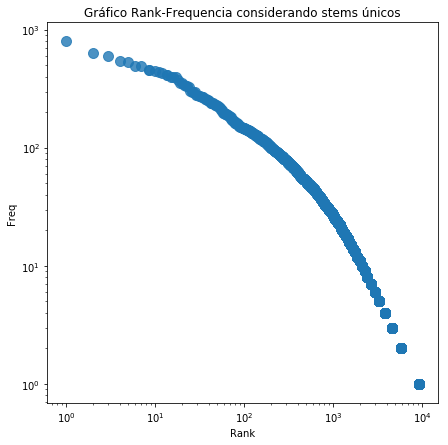

In [0]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
ax.set_title("Gráfico Rank-Frequencia considerando stems únicos")
sns.regplot("Rank", "Freq", all_stems_df, ax=ax, fit_reg = False, scatter_kws={"s": 100})

Aqui é interessante notar que, diferentemente do lab anterior, o gráfico não tenta se adequar a uma reta, mas ele segue uma parábola. O maior valor para c é de aproximadamente 0,2282, enquanto que no lab anterior, era de  0,146

In [0]:
stem_bigrams = nltk.bigrams(stems)
stem_bigram_freq = nltk.FreqDist(stem_bigrams)

stem_bigrams_df = pd.DataFrame(stem_bigram_freq.most_common(), columns = ["Bigram", "Freq"])
stem_bigrams_df["Rank"] = stem_bigrams_df["Freq"].rank(ascending = False)
stem_bigrams_df["Pr(%)"] = stem_bigrams_df.Freq / sum(stem_counter.values())
stem_bigrams_df["r*Pr"] = stem_bigrams_df.Rank * stem_bigrams_df["Pr(%)"]

In [0]:
print("Considerando todos os bigramas formados por stems, o maior valor c = Rank * Pr é de " + str(stem_bigrams_df['r*Pr'].max()))

Considerando todos os bigramas formados por stems, o maior valor c = Rank * Pr é de 0.4667040527646183


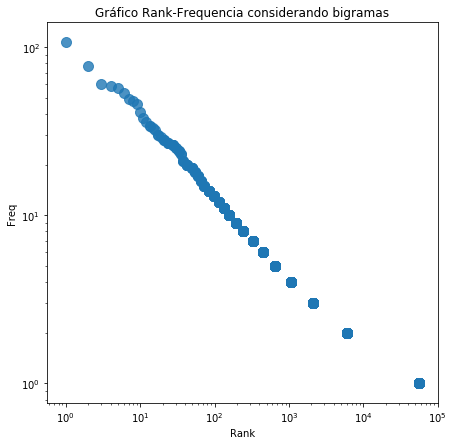

In [0]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
ax.set_title("Gráfico Rank-Frequencia considerando bigramas")
sns.regplot("Rank", "Freq", stem_bigrams_df, ax=ax, fit_reg = False, scatter_kws={"s": 100})

Aqui o gráfico é mais semelhante ao do lab anterior, porem, neste lab, os bigramas estão mais concentrados no meio da reta. Existem mais concentrações isoladas quando o rank cresce, em relação ao gráfico anterior.